# Tâche 8: Bandes électroniques 

In [105]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

In [106]:
with MPRester("Lyz7DTq5tVKRlBe9") as m:
    structure = m.get_structure_by_material_id("mp-672285")
    bandstruct = m.get_bandstructure_by_material_id("mp-672285")

## (1) Bande interdite

In [107]:
bandgap = bandstruct.get_band_gap()
gap_ev = bandgap['energy']
dist = data.get('distances')

if bandgap['direct'] == True :
    bandType = "directe"
else:
    bandType = "indirecte"
print("Bande interdite est", bandType, "et le gap est de ", gap_ev, "eV")
print("Transition: la direction ", bandgap['transition'], "de la zone de Brillouin du cristal")

Bande interdite est indirecte et le gap est de  2.2697000000000003 eV
Transition: la direction  Z-\Gamma de la zone de Brillouin du cristal


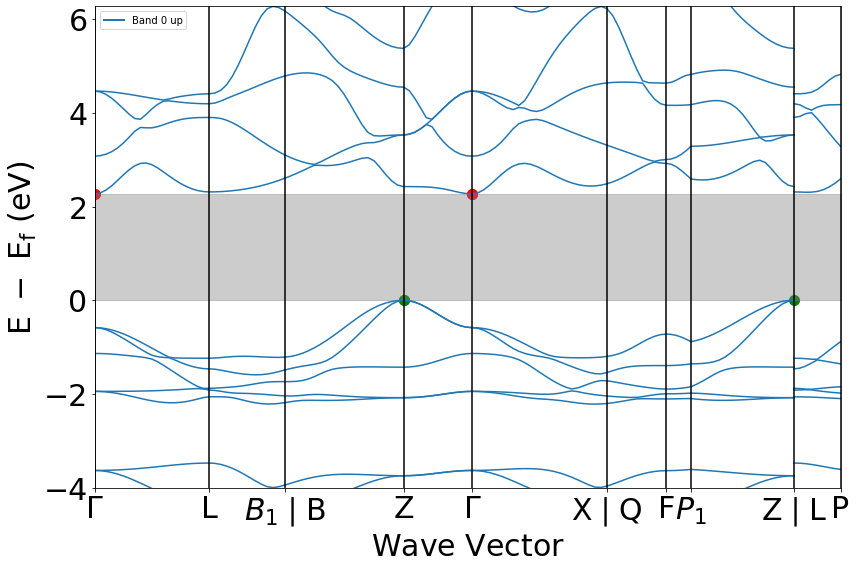

In [108]:
plot = BSPlotter(m.get_bandstructure_by_material_id("mp-672285")).get_plot(vbm_cbm_marker=True)
x = np.linspace(0.0, 6.25484, 500)
plt.fill_between(x, 0.0, 2.2697, color="grey", alpha=0.4)
plot.show()

## (2) Dispersion max/min dans la bande de valence & la bande de conduction

La plus grande dispersion dans la dernière bande de valence a lieu dans la direction : B1|B - Z (flèche rouge)
La plus petite dispersion dans la dernière bande de valence a lieu dans la direction : L - B1|B (flèche bleu) 

La plus grande dispersion dans la première bande de conduction a lieu dans la direction : F - P1 (flèche verte)
La plus petite dispersion dans la première bande de conduction a lieu dans la direction : Γ - L (flèche jaune) 

Structures des bandes électroniques du CuCSN :


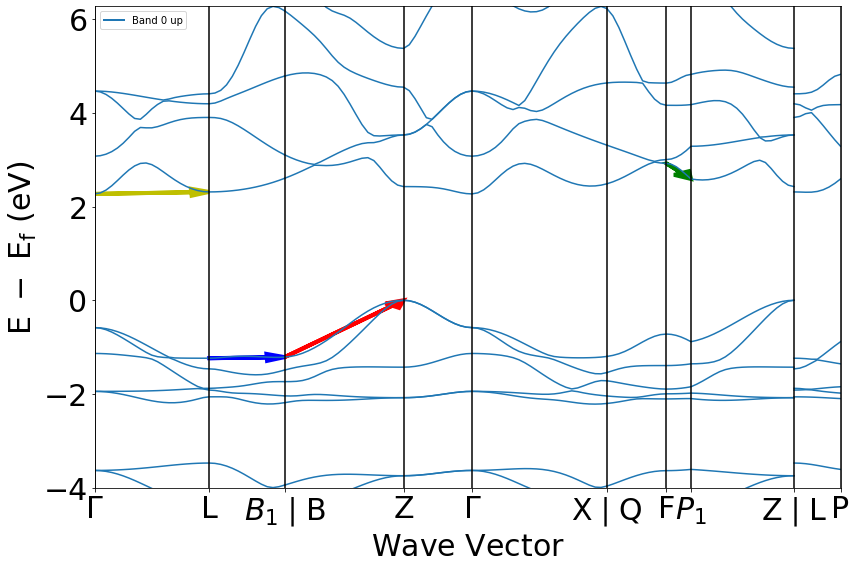

In [114]:
BSPlotter(bandstruct).bs_plot_data()
BSPlotter(bandstruct).get_plot()
E = data.get('energy')
D = data.get('ticks').get('distance')

Vidx = 15
Cidx = 16

PBragg = [D[0], D[1], D[3], D[4], D[6], D[8], D[9], D[11], D[13], D[14]]
slopeV = np.zeros(9)
slopeC = np.zeros(9)

for i in range(9):
    DeltaD = PBragg[i+1]-PBragg[i]
    slopeV[i] = abs(((E.get('1')[i][Vidx])[-1] - (E.get('1')[i][Vidx])[0])/(DeltaD) )
    slopeC[i] = abs(((E.get('1')[i][Cidx])[-1] - (E.get('1')[i][Cidx])[0])/(DeltaD) )


ExtrV = [np.amax(slopeV), np.amin(slopeV)] 
ExtrC = [np.amax(slopeC), np.amin(slopeC)]
IdxV = [(np.where(slopeV==ExtrV[0]))[0][0], (np.where(slopeV==ExtrV[1]))[0][0]]
IdxC = [(np.where(slopeC==ExtrC[0]))[0][0], (np.where(slopeC==ExtrC[1]))[0][0]] 
Idx = [IdxV[0], IdxV[1], IdxC[0], IdxC[1]]

print("La plus grande dispersion dans la dernière bande de valence a lieu dans la direction : B1|B - Z (flèche rouge)")
print("La plus petite dispersion dans la dernière bande de valence a lieu dans la direction : L - B1|B (flèche bleu)","\n")
print("La plus grande dispersion dans la première bande de conduction a lieu dans la direction : F - P1 (flèche verte)")
print("La plus petite dispersion dans la première bande de conduction a lieu dans la direction : Γ - L (flèche jaune)","\n")

#Plot
Bnd = [Vidx, Vidx, Cidx, Cidx]
Color = ['r','b','g','y']

def to_plot(num):
    plt.arrow(PBragg[Idx[num]], (E.get('1')[Idx[num]][Bnd[num]])[0],PBragg[Idx[num]+1] - PBragg[Idx[num]], 
              (E.get('1')[Idx[num]][Bnd[num]])[-1] - (E.get('1')[Idx[num]][Bnd[num]])[0], head_width=0.15,
             head_length=0.15, linewidth=4, color=Color[num],length_includes_head=True)


print("Structures des bandes électroniques du CuCSN :")
for i in range(4):
    to_plot(i)
plt.show()

## (3) Masse effective

### (3.1) Masse effective sommet bande de valence

In [110]:
print("Calculons la masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique.")
print("Connaissant le sommet(α,β) et un point, on peut retrouver l'équation de la parabole : y = a(x-α)^2 + β\n")

x1, y1 = PBragg[3], E.get('1')[3][Vidx][0]  #sommet bande de valence
x2, y2 = PBragg[2], E.get('1')[2][Vidx][0]  #point proche du sommet

print("point 1 (sommet bande de valance): ({}, {})".format(x1,y1))
print("point 2 : ({}, {})".format(x2,y2),"\n")

a = (y2-y1)/(x2-x1)**2

print("Equation parabole E(k) = {}(k-{})^2 + {}".format(a,x1,y1),"\n")

ddEdk = 2*a * 10**(-20) * 1.602176634*10**(-19) #[J.m^2]
hbar = 1.054571817*10**(-34) #[J.s]

print("Formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print("La masse effective: m* = {} kg".format(hbar**2/ddEdk))

Calculons la masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique.
Connaissant le sommet(α,β) et un point, on peut retrouver l'équation de la parabole : y = a(x-α)^2 + β

point 1 (sommet bande de valance): (2.591138067471876, 0.0)
point 2 : (1.5936604527358746, -1.2135) 

Equation parabole E(k) = -1.2196450695984942(k-2.591138067471876)^2 + 0.0 

Formule m* = (hbar**2)/((d**2 E)/(dk**2))
La masse effective: m* = -2.8456302423132118e-30 kg


### (3.2) Masse effective base bande de conduction

In [111]:
print("Calculons la masse effective a la base de la première bande de conduction en supposant une dispersion parabolique.")
print("Connaissant le sommet(α,β) et un point, on peut retrouver l'équation de la parabole : y = a(x-α)^2 + β\n")

x1, y1 = PBragg[4], E.get('1')[4][Cidx][0] #sommet bande de conduction
x2, y2 = PBragg[3], E.get('1')[3][Cidx][0] #point proche du sommet 

print("point 1 (sommet bande de conduction): ({}, {})".format(x1,y1))
print("point 2 : ({}, {})".format(x2,y2),"\n")

a = (y2-y1)/(x2-x1)**2

print("Equation parabole E(k) = {}(k-{})^2 + {}".format(a,x1,y1),"\n")

ddEdk = 2*a * 10**(-20) * 1.602176634*10**(-19) #[J.m^2]
hbar = 1.054571817*10**(-34) #[J.s]

print("Formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print("La masse effective: m* = {} kg".format(hbar**2/ddEdk))

Calculons la masse effective a la base de la première bande de conduction en supposant une dispersion parabolique.
Connaissant le sommet(α,β) et un point, on peut retrouver l'équation de la parabole : y = a(x-α)^2 + β

point 1 (sommet bande de conduction): (3.164330907930454, 2.2697000000000003)
point 2 : (2.591138067471876, 2.426) 

Equation parabole E(k) = 0.4757266309810656(k-3.164330907930454)^2 + 2.2697000000000003 

Formule m* = (hbar**2)/((d**2 E)/(dk**2))
La masse effective: m* = 7.295490033383926e-30 kg
